# Simple Linear Regression 

### Problem statement 

The analytics team has a key challenge of understanding how effective radio promotions are boosting sales. The dataset includes campaigns of TV, radio, and social media, along with the revenue they generate. The critical task is to explore the connection between the budget spent on radio promotions and the resulting revenue.

The goal of this notebook is to look closely at the data, especially the part about advertisement campaign, and figure out how it relate to the revenue it make. In essence, the task at hand is to provide them with a clear understanding of the relationship between types of marketing campaigns and the revenue generated as a result of this investment.

### Step 1: Import necessary packages and load the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols


Load the dataset `marketing_sales_data.csv` containing information about promotional marketing conducted in collaboration with influencers, along with the corresponding sales.

In [2]:
Dataset = pd.read_csv('marketing_sales_data.csv')

### Step 2: Data exploration

In [5]:
#Check the number of rows and column 

row,column = Dataset.shape
print(f"Number of rows are {row} and number of columns {column}")

Number of rows are 572 and number of columns 5


In [7]:
#Display the first 10 rows of data 
Dataset.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


In [10]:
#Explore its datatype 

Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            571 non-null    object 
 1   Radio         571 non-null    float64
 2   Social Media  572 non-null    float64
 3   Influencer    572 non-null    object 
 4   Sales         571 non-null    float64
dtypes: float64(3), object(2)
memory usage: 22.5+ KB


In [11]:
#Explore its descriptive statistics 

Dataset.describe()

,Radio,Social Media,Sales
count,571.000000,572.000000,571.000000
mean,18.646472,3.248471,193.516937
std,9.650740,2.195696,90.516153
min,0.194576,0.013230,31.199409
25%,10.878554,1.447163,118.544562
50%,18.810430,2.945318,198.521410
75%,25.838296,4.791290,268.567987
max,48.871161,11.260430,358.420739


**Observation:** 

1. The TV promotion expense is expressed as 'Low' 'Medium' 'High'
2. The Influencer promotion expense is expressed as 'Micro' 'Macro' 'Mega'
3. The radio, social media and sales budget are expressed in million USD.

In [12]:
# Check for missing values in the rows of the data

Dataset.isna()

,TV,Radio,Social Media,Influencer,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
567,False,False,False,False,False
568,False,False,False,False,False
569,False,False,False,False,False
570,False,False,False,False,False


In [13]:
#Check how many data are missing

Dataset.isna().any(axis=1).sum()



3

Three entries are NA, lets drop those rows before modelling mathematical relationship between each variable.

In [14]:
Dataset = Dataset.dropna(axis=0)

In [15]:
#Check whether it is dropped or not

Dataset.isna().any(axis=1).sum()

0

#### Check model assumption 

C:\Users\DevendiranDi\AppData\Local\anaconda3_Version2\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


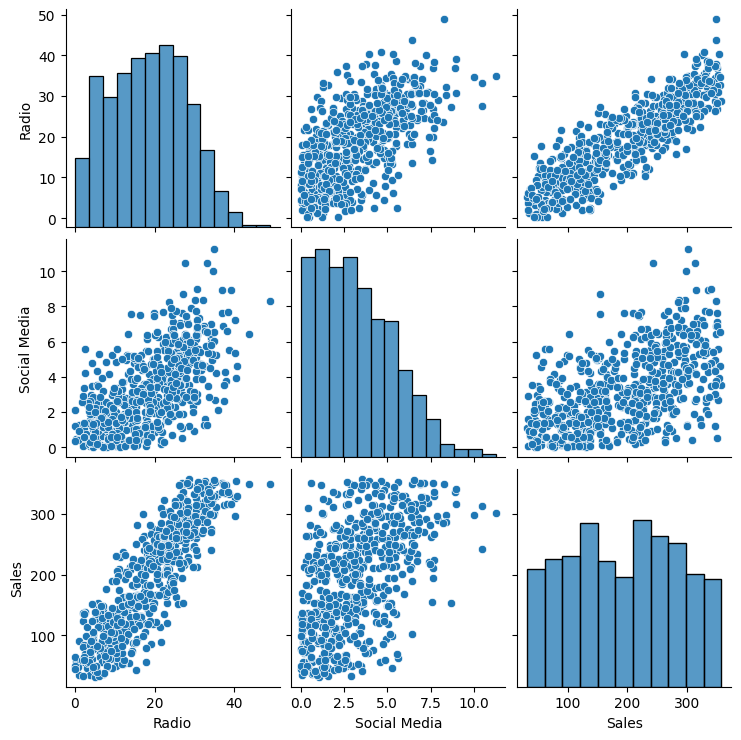

In [16]:
# First visualize the relationships between variables in the data

sns.pairplot(Dataset)

This scatter plot matrix shows the relationship between pairs of variables. THe diagnals shows the distribution of continous variable. It can be observed that the variable `Radio` and `Sales` are positively correlated, and it can be observed that the datapoints cluster around a line, and it seems the assumption of linearity is met. 

So select only `Radio` and `Sales` from the dataset to build the linear regression model. 

## Step 3: Model Building

In [17]:
# Select relevant columns and subset the data

Dataset_for_model = Dataset[["Radio", "Sales"]] 

In [19]:
# Display first 10 rows of the new DataFrame
Dataset_for_model.head(10)

,Radio,Sales
0,1.218354,90.054222
1,14.949791,222.741668
2,10.377258,102.774790
3,26.469274,328.239378
4,36.876302,351.807328
5,25.561910,261.966812
6,37.263819,349.861575
7,13.187256,140.415286
8,29.520170,264.592233
9,3.773287,55.674214


In [21]:
#Mathematical formula for regression

Formula = "Sales ~ Radio"

#### Implement the Ordinary Least Squares (OLS) approach for linear regression.

In [23]:
Ordinary_least_square = ols(formula = Formula, data = Dataset_for_model)
model = Ordinary_least_square.fit()

## Step 4: Results and Evaluation


In [24]:
# Get a summary of the result 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          2.07e-176
Time:                        12:10:26   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observation 

- The y-intercept is 41.5326 and the slope is 8.1733
- The relationship between sales and radio promotion budget is `Sales` = 8.1733*`Radio` + 41.5326

## Step 4: Check modelling assumption 

### I. Checking the assumption of linearity 

<Axes: xlabel='Radio', ylabel='Sales'>

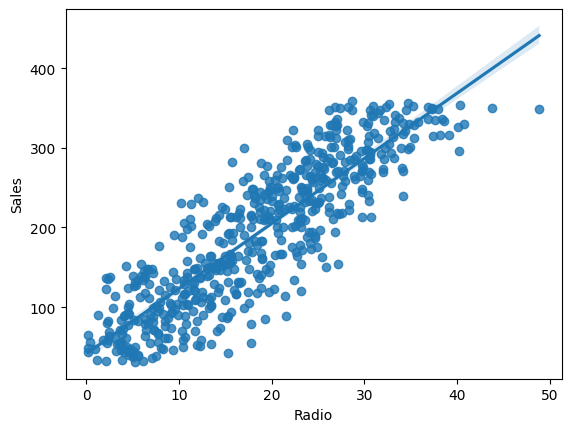

In [25]:
sns.regplot(x = 'Radio', y = 'Sales', data = Dataset_for_model)

The variable `Sales` and `Radio` are possitively correlated and illustrates linear relationship. This confirms the assumption of linearity.

### II. Checking the assumption of normality 

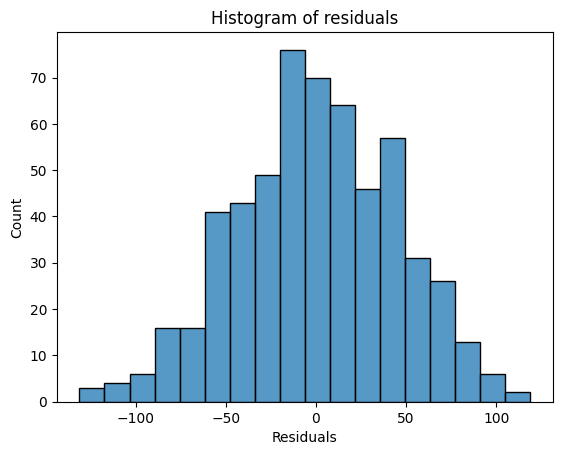

In [27]:
residuals = model.resid
fig = sns.histplot(residuals)
fig.set_xlabel("Residuals")
fig.set_title("Histogram of residuals")
plt.show()

The distribution of the residuals is approximately normal. This confirms the assumption of linearity.

### III. Check the assumptions of independent observation and homoscedasticity

In [28]:
predicted_values = model.predict(Dataset_for_model["Radio"])

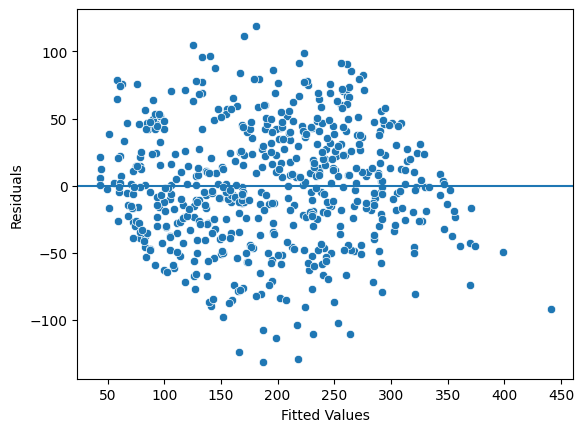

In [30]:
fig = sns.scatterplot(x=predicted_values, y=residuals)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()

It can be observed that the data points have a cloud-like resemblance and do not follow an explicit pattern. So it appears that the independent observation assumption has not been violated, and the residuals appear to be randomly spaced, and the homoscedasticity assumption seems to be met.

## Conclusion

#### Interpretation of Simple Linear Regression Model:

According to the simple linear regression model, for every 1 million dollars spent on radio marketing campaigns, the sales are expected to increase by 8.1733 million dollars. This insight is derived from the slope obtained in the linear regression analysis, indicating a positive relationship between the budget allocated to radio marketing and the resulting increase in sales.

#### Statistical interpretation of the obtained mathematical model:

The results are statistically significant with a p-value of 0.000, which is a very small value (smaller than the common significance level of 0.05). This indicates that there is a very low probability of observing data as extreme or more extreme than this dataset when the null hypothesis is true. In this context, the null hypothesis is that there is no relationship between radio promotion budget and sales (i.e. the slope is zero), and the alternative hypothesis is that there is a relationship between radio promotion budget and sales i.e. the slope is not zero. So, you could reject the null hypothesis and state that there is a relationship between radio promotion budget and sales for companies in this data.

The slope of the line of best fit that resulted from the regression model is approximate and subject to uncertainty (not the exact value). The 95% confidence interval for the slope is from 7.791 to 8.555. This indicates that there is a 95% probability that the interval [7.791, 8.555] contains the true value for the slope.